<a href="https://colab.research.google.com/github/Ragulan-K/FYP/blob/main/Solar_Radiation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SolarPrediction - Copy - Copy - Copy.csv to SolarPrediction - Copy - Copy - Copy.csv


In [ ]:
dataset = pd.read_csv('SolarPrediction - Copy - Copy - Copy.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,RadiationNew,Particle size
7416,1472724008,9/1/2016 0:00,0:00:08,2.58,51,30.43,103,77.27,11.25,6:07:00,18:38:00,1.713894,225
7415,1472724310,9/1/2016 0:00,0:05:10,2.83,51,30.43,103,153.44,9.00,6:07:00,18:38:00,1.879969,225
7414,1472725206,9/1/2016 0:00,0:20:06,2.16,51,30.43,103,142.04,7.87,6:07:00,18:38:00,1.434888,225
7413,1472725505,9/1/2016 0:00,0:25:05,2.21,51,30.43,103,144.12,18.00,6:07:00,18:38:00,1.468103,225
7412,1472725809,9/1/2016 0:00,0:30:09,2.25,51,30.43,103,67.42,11.25,6:07:00,18:38:00,1.494675,225


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32686, 13)
        UNIXTime           Data     Time  Radiation  Temperature  Pressure  \
7416  1472724008  9/1/2016 0:00  0:00:08       2.58           51     30.43   
7415  1472724310  9/1/2016 0:00  0:05:10       2.83           51     30.43   
7414  1472725206  9/1/2016 0:00  0:20:06       2.16           51     30.43   
7413  1472725505  9/1/2016 0:00  0:25:05       2.21           51     30.43   
7412  1472725809  9/1/2016 0:00  0:30:09       2.25           51     30.43   

      Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  \
7416       103                   77.27  11.25     6:07:00   18:38:00   
7415       103                  153.44   9.00     6:07:00   18:38:00   
7414       103                  142.04   7.87     6:07:00   18:38:00   
7413       103                  144.12  18.00     6:07:00   18:38:00   
7412       103                   67.42  11.25     6:07:00   18:38:00   

      RadiationNew  Particle size  
7416      1.713894            225  
7415      1.87

In [ ]:
dataset.isna().any()

Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
DayOfYear                 False
DayLength(s)              False
Particle size             False
RadiationNew              False
dtype: bool

In [ ]:
missing_data = pd.DataFrame({'total_missing': dataset.isnull().sum(), 'perc_missing': (dataset.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Temperature,0,0.0
Pressure,0,0.0
Humidity,0,0.0
WindDirection(Degrees),0,0.0
Speed,0,0.0
DayOfYear,0,0.0
DayLength(s),0,0.0
Particle size,0,0.0
RadiationNew,0,0.0


<Axes: >

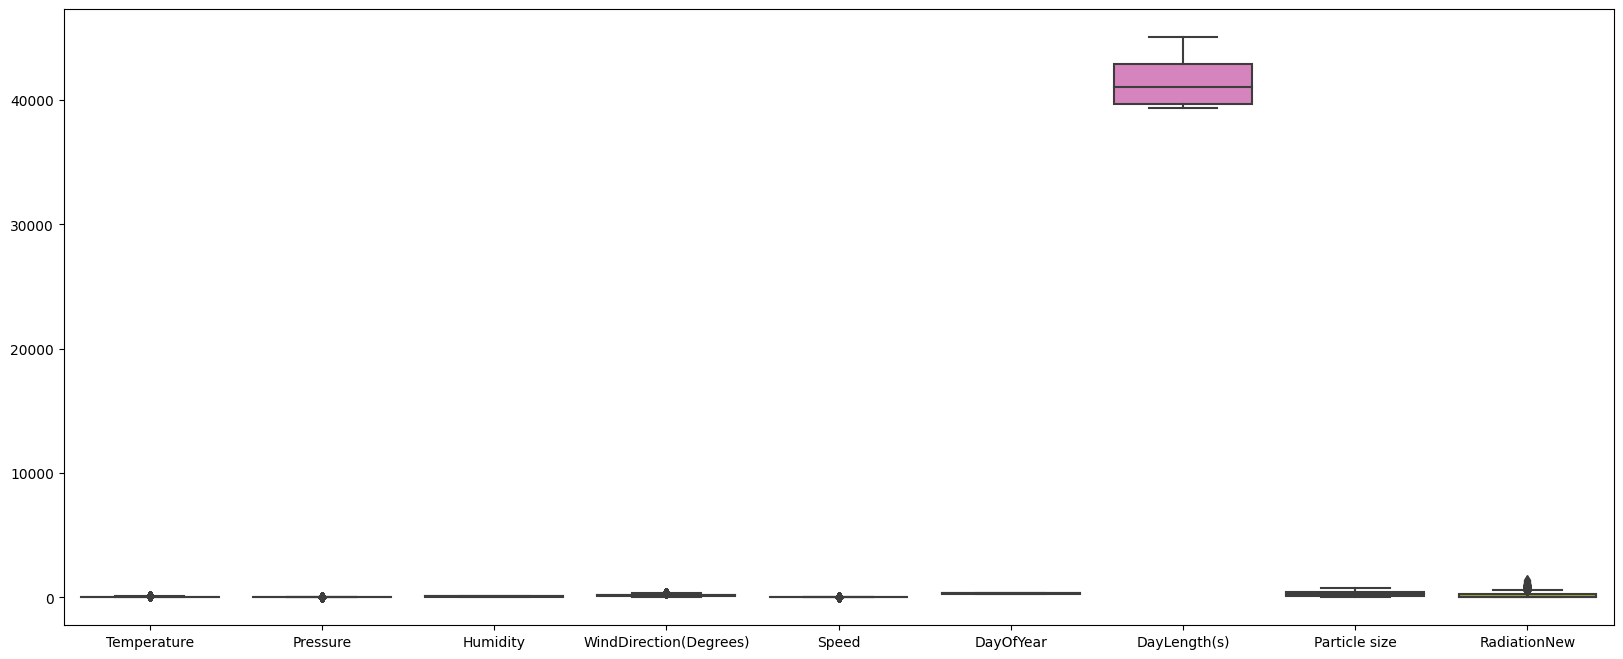

In [ ]:
# checking distribution and ranges of predictor variables
plt.figure(figsize=(20,8))
sns.boxplot(data = dataset)

In [ ]:
combined = pd.concat([dataset.head(10), dataset.tail(10)])
display(combined)

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DayOfYear,DayLength(s),Particle size,RadiationNew
UNIXTime,,,,,,,,,
2016-09-01 00:00:08-10:00,51,30.43,103,77.27,11.25,245,45060,225,1.713894
2016-09-01 00:05:10-10:00,51,30.43,103,153.44,9.00,245,45060,225,1.879969
2016-09-01 00:20:06-10:00,51,30.43,103,142.04,7.87,245,45060,225,1.434888
2016-09-01 00:25:05-10:00,51,30.43,103,144.12,18.00,245,45060,225,1.468103
2016-09-01 00:30:09-10:00,51,30.43,103,67.42,11.25,245,45060,225,1.494675
2016-09-01 00:45:04-10:00,51,30.43,103,67.85,4.50,245,45060,225,1.428245
2016-09-01 00:50:06-10:00,51,30.43,103,156.58,1.12,245,45060,225,1.375101
2016-09-01 00:55:04-10:00,52,30.43,103,69.98,7.87,245,45060,225,1.368458
2016-09-01 01:00:07-10:00,52,30.43,103,92.15,4.50,245,45060,225,1.395030


In [ ]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
                           + dataset['TimeSunSet'].dt.minute*60 \
                           + dataset['TimeSunSet'].dt.second \
                           - dataset['TimeSunRise'].dt.hour*60*60 \
                           - dataset['TimeSunRise'].dt.minute*60 \
                           - dataset['TimeSunRise'].dt.second
dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,RadiationNew,Particle size,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,1.713894,225,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,1.879969,225,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,1.434888,225,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,1.468103,225,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,1.494675,225,9,245,35,0,30,1809,45060


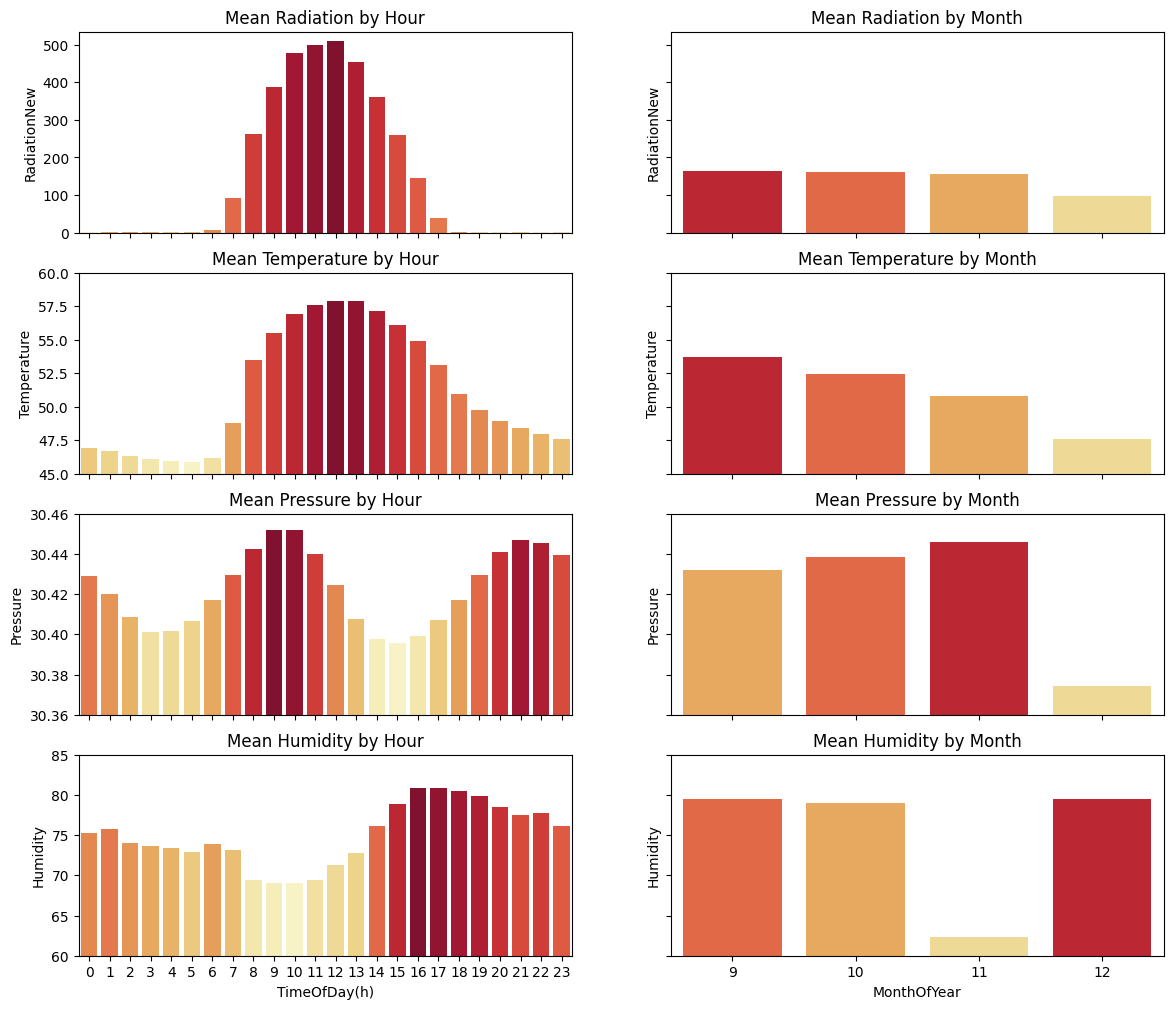

In [ ]:
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['RadiationNew'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='RadiationNew', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['RadiationNew'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='RadiationNew', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort()
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort()
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

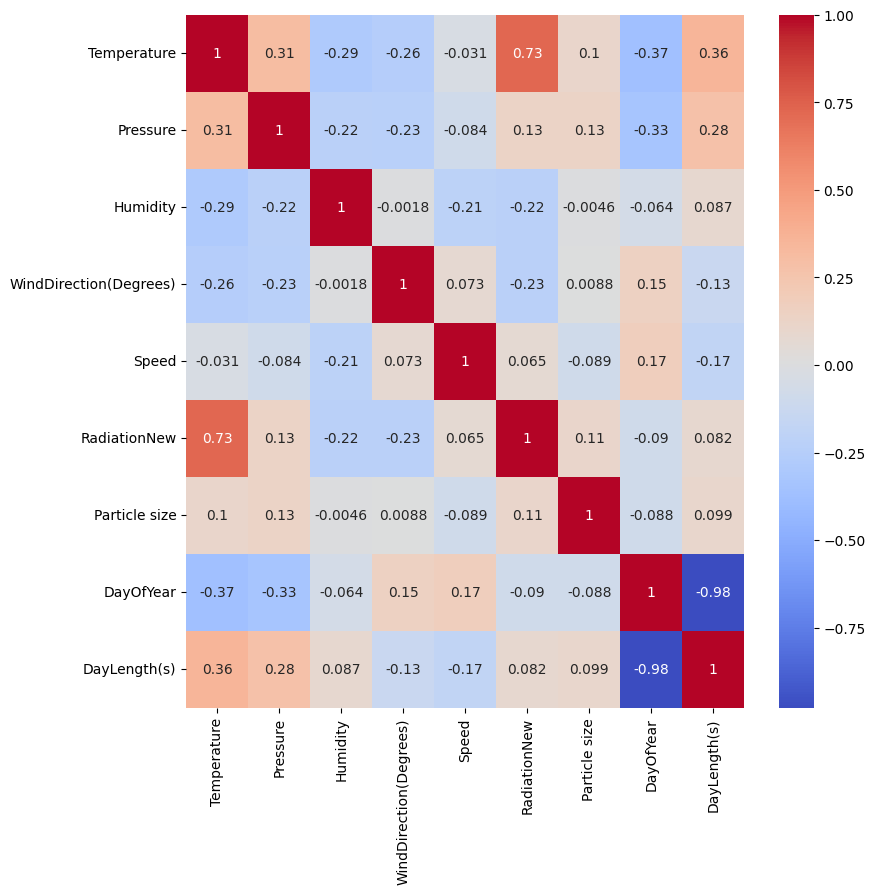

In [ ]:
corrmat = dataset.drop(['Radiation','TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat,  cmap = 'coolwarm',annot=True)
plt.show()

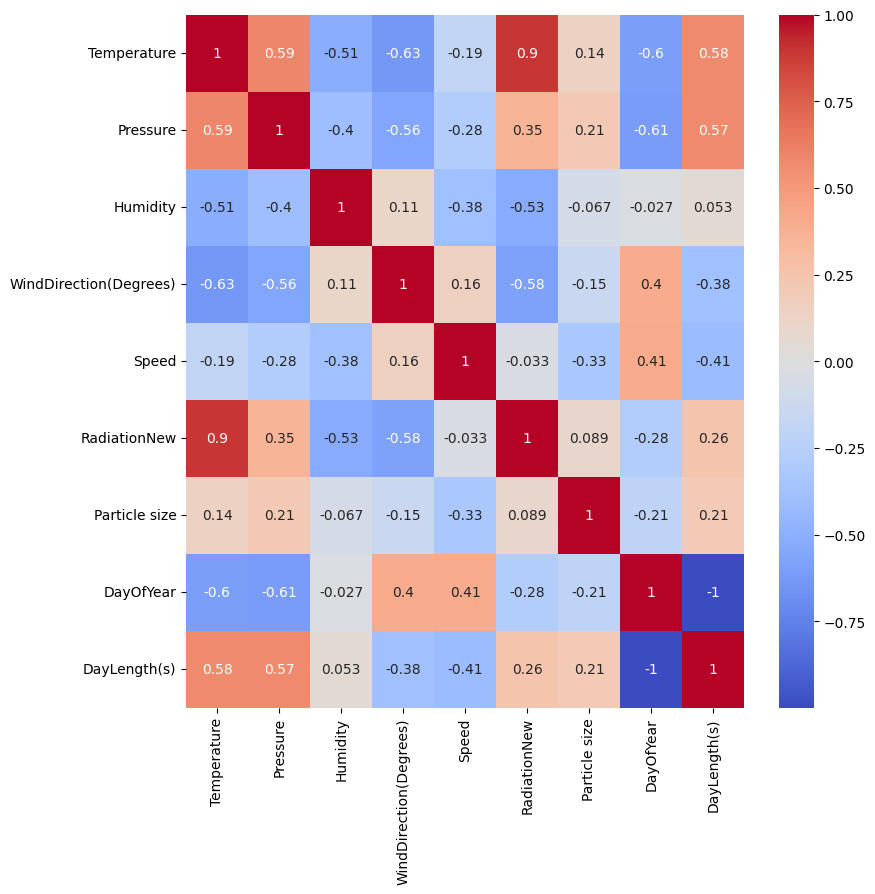

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(corrmat.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'DayLength(s)','Particle size']]
y = dataset['RadiationNew']

In [ ]:
# Function to update the interactive table based on the selected columns
def update_table(selected_columns):
    display(dataset[selected_columns])

# Get the list of columns from the DataFrame
all_columns = dataset.columns.tolist()

# Display the initial table with all columns
update_table(all_columns)

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,RadiationNew,Particle size,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,1.713894,225,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,1.879969,225,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,1.434888,225,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,1.468103,225,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,1.494675,225,9,245,35,0,30,1809,45060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:35:02-10:00,1483263302,1.22,41,30.34,83,238.94,6.75,1.071892,725,12,366,52,23,1415,84902,39420
2016-12-31 23:40:01-10:00,1483263601,1.21,41,30.34,82,236.79,5.62,1.063106,725,12,366,52,23,1420,85201,39420
2016-12-31 23:45:04-10:00,1483263904,1.21,42,30.34,81,218.28,7.87,1.063106,725,12,366,52,23,1425,85504,39420


In [ ]:
dataset = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'DayLength(s)','Particle size','RadiationNew']]
all_columns = dataset.columns.tolist()
update_table(all_columns)

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DayOfYear,DayLength(s),Particle size,RadiationNew
UNIXTime,,,,,,,,,
2016-09-01 00:00:08-10:00,51,30.43,103,77.27,11.25,245,45060,225,1.713894
2016-09-01 00:05:10-10:00,51,30.43,103,153.44,9.00,245,45060,225,1.879969
2016-09-01 00:20:06-10:00,51,30.43,103,142.04,7.87,245,45060,225,1.434888
2016-09-01 00:25:05-10:00,51,30.43,103,144.12,18.00,245,45060,225,1.468103
2016-09-01 00:30:09-10:00,51,30.43,103,67.42,11.25,245,45060,225,1.494675
...,...,...,...,...,...,...,...,...,...
2016-12-31 23:35:02-10:00,41,30.34,83,238.94,6.75,366,39420,725,1.071892
2016-12-31 23:40:01-10:00,41,30.34,82,236.79,5.62,366,39420,725,1.063106
2016-12-31 23:45:04-10:00,42,30.34,81,218.28,7.87,366,39420,725,1.063106


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_test

array([[ 0.62988744,  1.77904578, -2.03887784, ..., -0.48842184,
         0.3786991 ,  1.66120321],
       [ 2.24676938,  0.67751739, -1.80805882, ...,  0.08632035,
        -0.288703  , -1.06489182],
       [ 0.14482286,  0.86110546, -0.57702402, ...,  0.34495433,
        -0.55566384, -1.06489182],
       ...,
       [-0.50192991,  1.04469352, -1.26948109, ...,  1.52317582,
        -1.15632574, -1.06489182],
       [-0.8253063 , -0.05683486, -0.0384463 , ..., -1.6091691 ,
         1.84698373,  1.66120321],
       [-0.8253063 ,  0.86110546, -1.26948109, ...,  0.74727386,
        -0.88936489, -0.3884923 ]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))

feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

<ipython-input-93-609cff3b7352>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
<ipython-input-93-609cff3b7352>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
<ipython-input-93-609cff3b7352>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
<ipython-input-93-609cff3b7352>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  removed_columns = removed_co

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.889265
1,"Temperature, Pressure, Humidity, WindDirection...",0.888036
2,"Temperature, Pressure, Humidity, WindDirection...",0.883805
3,"Temperature, Humidity, WindDirection(Degrees),...",0.856460
4,"Temperature, Humidity, DayOfYear",0.861082


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: >

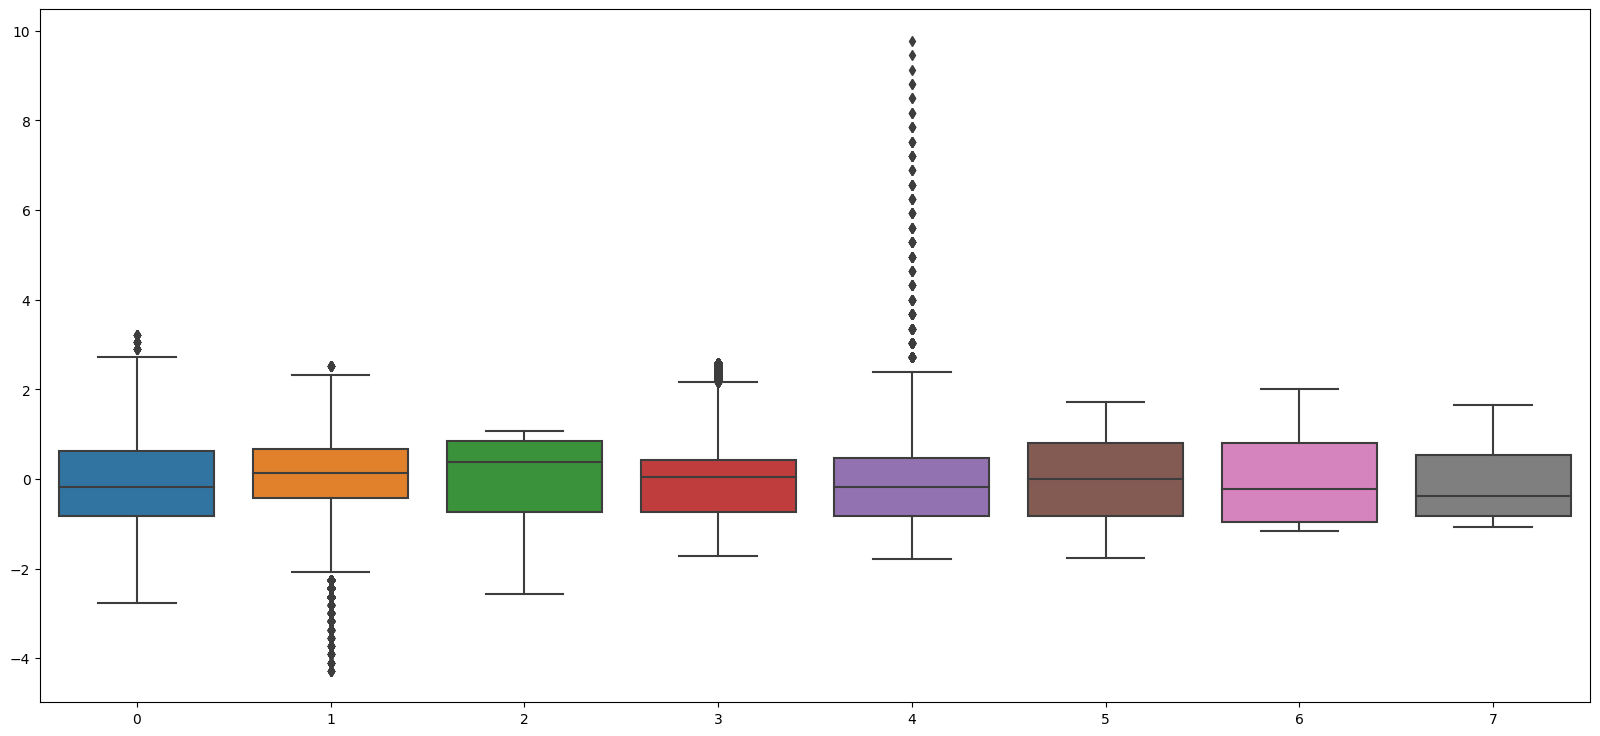

In [ ]:
# checking distribution and ranges of predictor variables
plt.figure(figsize=(20,9))
sns.boxplot(data = X_train)

In [ ]:
X_train_best = X_train[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'DayLength(s)','Particle size']]
X_test_best = X_test[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'DayLength(s)','Particle size']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor()

In [ ]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.8881007453393753


In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.8992491999038319
mse = 5191.203085259367
r2 = 0.899243952960628


In [ ]:
dataset['y_pred'] = regressor.predict(dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'DayLength(s)','Particle size']])

In [ ]:
# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d

output_notebook()

p = figure(width=800,
           height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime",
           toolbar_location="above")  # Add toolbar for better interaction

p.x_range = Range1d(dataset.index[0], dataset.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))

# Plot observed solar irradiance
p.line(dataset.index, dataset['RadiationNew'], line_width=1, legend_label='Observed Solar Irradiance')

# Plot predicted solar irradiance
p.line(dataset.index, dataset['y_pred'], line_width=1, line_color="red", legend_label='Predicted Solar Irradiance')

# Add legend
p.legend.location = "top_left"
p.legend.click_policy = "hide"

show(p, notebook_handle=True)








In [ ]:
a=[[51,30.43,103,77.27,11.25,245,45060,225]]
PredictedmodelResult =regressor.predict(a)
print(PredictedmodelResult)

[10.80108336]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
